In [6]:
library(gplots)
library(ggplot2)
library(reshape2)

In [7]:
filtered <- read.table("../20230101_QC/final_summary_anno3.txt",header=T,sep="\t")
variant_list <- read.table("../variant_annotation/780_variant_annotation.csv",header=T,sep=",",row.names=1)
filtered$Punch<-as.character(filtered$Punch)
filtered$Note<-as.character(filtered$Note)
mosaic_filtered <- filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,] #Use validated variants. assign this to mosaic_filtered
shared_variant_list<-variant_list[variant_list$sample_number_presented>1,] #take shared variants names
shared_mosaic_filtered<-mosaic_filtered[mosaic_filtered$CHROM.POS.REF.ALT %in% rownames(shared_variant_list),]

In [8]:
melt_mtcars<-shared_mosaic_filtered[,c("ID", "MAF", "CHROM.POS.REF.ALT","Cell_Type","Location",'Region','Punch','Hemisphere')]
melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('TBR1','DLX1'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('Bulk'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Organ %in% c('CTX','BG','HIP'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Organ %in% c('CTX'),]

melt_mtcars<-melt_mtcars[melt_mtcars$Region %in% c('P'),]
melt_mtcars<-melt_mtcars[melt_mtcars$Hemisphere %in% c('R'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Punch %in% c('1','2','3','4','5','6','7','8','9','10','11','12',
#                                                  '13','14','15','16','17') ,]
melt_mtcars<-melt_mtcars[melt_mtcars$Punch %in% c('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17'),]
melt_mtcars<-melt_mtcars[!melt_mtcars$ID %in% c('7669_R_P_9_DLX1'),]
melt_mtcars$MAF <- sqrt(melt_mtcars$MAF)

In [9]:
casted_MAF_VarBySample <- dcast(melt_mtcars, CHROM.POS.REF.ALT~ID, value.var = "MAF" , na.rm=T)

rownames(casted_MAF_VarBySample) <- casted_MAF_VarBySample$CHROM.POS.REF.ALT

casted_MAF_VarBySample2 <- casted_MAF_VarBySample[ , !(names(casted_MAF_VarBySample) %in% c("CHROM.POS.REF.ALT"))]
#casted_MAF_VarBySample_umap<-umap(casted_MAF_VarBySample2)

In [10]:
rownames(casted_MAF_VarBySample2)[1]

[1] "1-102152318-C-T"

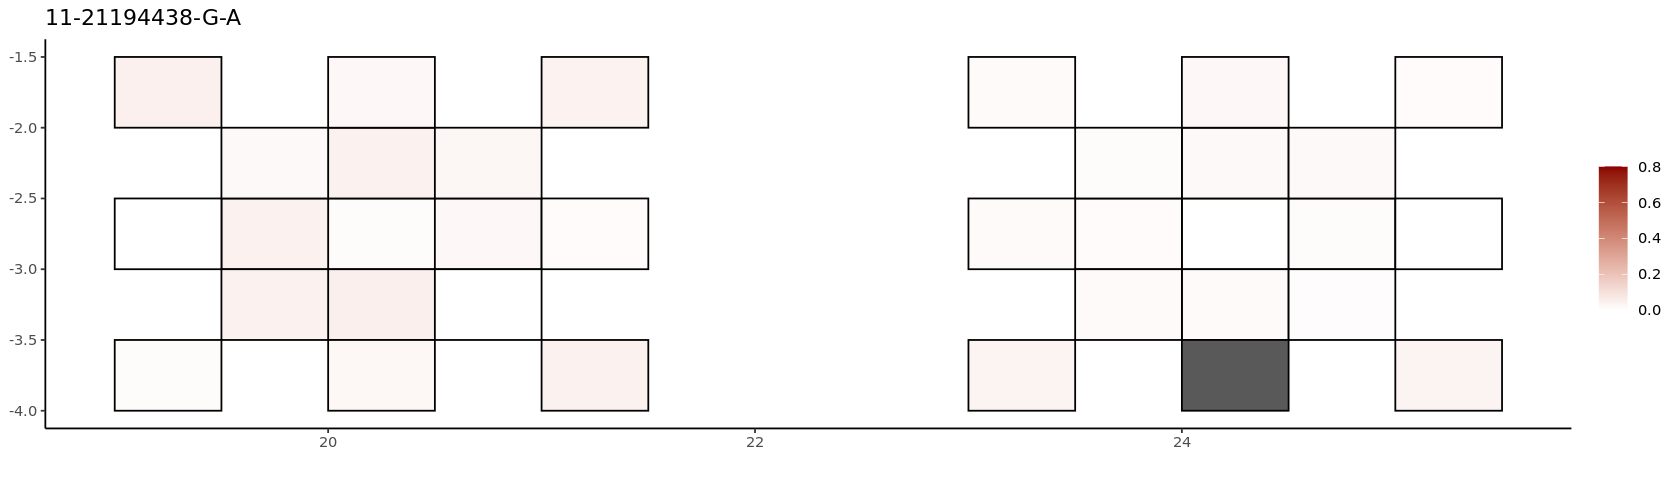

In [15]:
R1 <- 3
R2 <- 5
R3 <- 7
i <- 20
j<- -3
h <- 29
k <- 24
l <- -3
x <- 27
options(repr.plot.width=14, repr.plot.height=4)

ggplot() +  

#DLX1+ nuclei Parietal lobe geoclone
geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_1_DLX1'),color='black')+
geom_rect(aes(xmin = i+0.5, xmax = i+1, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_3_DLX1'),color='black')+
geom_rect(aes(xmin = i+1, xmax = i+1.5, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_13_DLX1'),color='black')+
geom_rect(aes(xmin = i-0.5, xmax = i, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_2_DLX1'),color='black')+
geom_rect(aes(xmin = i-1, xmax = i-0.5, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_15_DLX1'),color='black')+

geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j+0.5, ymax = j+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_5_DLX1'),color='black')+
geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j+1, ymax = j+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_11_DLX1'),color='black')+
geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j-0.5, ymax = j, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_4_DLX1'),color='black')+
geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_10_DLX1'),color='black')+

geom_rect(aes(xmin = i+0.5, xmax = i+1, ymin = j+0.5, ymax = j+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_8_DLX1'),color='black')+
geom_rect(aes(xmin = i+1, xmax = i+1.5, ymin = j+1, ymax = j+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_12_DLX1'),color='black')+
geom_rect(aes(xmin = i-0.5, xmax = i, ymin = j-0.5, ymax = j, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_7_DLX1'),color='black')+
geom_rect(aes(xmin = i-1, xmax = i-0.5, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_17_DLX1'),color='black')+

geom_rect(aes(xmin = i-0.5, xmax = i, ymin = j+0.5, ymax = j+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_9_DLX'),color='black')+
geom_rect(aes(xmin = i-1, xmax = i-0.5, ymin = j+1, ymax = j+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_16_DLX1'),color='black')+
geom_rect(aes(xmin = i+0.5, xmax = i+1, ymin = j-0.5, ymax = j, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_6_DLX1'),color='black')+
geom_rect(aes(xmin = i+1, xmax = i+1.5, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_14_DLX1'),color='black')+

#TBR1+ nuclei parietal lobe geoclone
geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_1_TBR1'),color='black')+
geom_rect(aes(xmin = k+0.5, xmax = k+1, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_3_TBR1'),color='black')+
geom_rect(aes(xmin = k+1, xmax = k+1.5, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_13_TBR1'),color='black')+
geom_rect(aes(xmin = k-0.5, xmax = k, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_2_TBR1'),color='black')+
geom_rect(aes(xmin = k-1, xmax = k-0.5, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_15_TBR1'),color='black')+

geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l+0.5, ymax = l+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_5_TBR1'),color='black')+
geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l+1, ymax = l+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_11_TBR1'),color='black')+
geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l-0.5, ymax = l, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_4_TBR1'),color='black')+
geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l-1, ymax = l-0.5, fill=casted_MAF_VarBySample2[x,]$''),color='black')+

geom_rect(aes(xmin = k+0.5, xmax = k+1, ymin = l+0.5, ymax = l+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_8_TBR1'),color='black')+
geom_rect(aes(xmin = k+1, xmax = k+1.5, ymin = l+1, ymax = l+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_12_TBR1'),color='black')+
geom_rect(aes(xmin = k-0.5, xmax = k, ymin = l-0.5, ymax = l, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_7_TBR1'),color='black')+
geom_rect(aes(xmin = k-1, xmax = k-0.5, ymin = l-1, ymax = l-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_17_TBR1'),color='black')+

geom_rect(aes(xmin = k-0.5, xmax = k, ymin = l+0.5, ymax = l+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_9_TBR1'),color='black')+
geom_rect(aes(xmin = k-1, xmax = k-0.5, ymin = l+1, ymax = l+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_16_TBR1'),color='black')+
geom_rect(aes(xmin = k+0.5, xmax = k+1, ymin = l-0.5, ymax = l, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_6_TBR1'),color='black')+
geom_rect(aes(xmin = k+1, xmax = k+1.5, ymin = l-1, ymax = l-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_14_TBR1'),color='black')+

scale_fill_gradient(low = "white", high = "red4", limits=c(0,0.8))+theme_classic()+labs(title=rownames((casted_MAF_VarBySample2))[x],x="")+theme(legend.title=element_blank())
#scale_color_gradientn(colours = c('grey90',RColorBrewer::brewer.pal(n = 6,name = 'YlOrRd')))

In [17]:
pdf(file="Interneuron_7669_R_P_1to17_geoclone.pdf",width=10,height=4)
for(x in 1:186){
#temp<-final[final$CHROM.POS.REF.ALT==names(table(final$CHROM.POS.REF.ALT))[i],]
plot <- ggplot() + 
#DLX1+ nuclei Parietal lobe geoclone
    geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_1_DLX1'),color='black')+
    geom_rect(aes(xmin = i+0.5, xmax = i+1, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_3_DLX1'),color='black')+
    geom_rect(aes(xmin = i+1, xmax = i+1.5, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_13_DLX1'),color='black')+
    geom_rect(aes(xmin = i-0.5, xmax = i, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_2_DLX1'),color='black')+
    geom_rect(aes(xmin = i-1, xmax = i-0.5, ymin = j, ymax = j+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_15_DLX1'),color='black')+

    geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j+0.5, ymax = j+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_5_DLX1'),color='black')+
    geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j+1, ymax = j+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_11_DLX1'),color='black')+
    geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j-0.5, ymax = j, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_4_DLX1'),color='black')+
    geom_rect(aes(xmin = i, xmax = i+0.5, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_10_DLX'),color='black')+

    geom_rect(aes(xmin = i+0.5, xmax = i+1, ymin = j+0.5, ymax = j+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_8_DLX1'),color='black')+
    geom_rect(aes(xmin = i+1, xmax = i+1.5, ymin = j+1, ymax = j+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_12_DLX1'),color='black')+
    geom_rect(aes(xmin = i-0.5, xmax = i, ymin = j-0.5, ymax = j, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_7_DLX1'),color='black')+
    geom_rect(aes(xmin = i-1, xmax = i-0.5, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_17_DLX1'),color='black')+

    geom_rect(aes(xmin = i-0.5, xmax = i, ymin = j+0.5, ymax = j+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_9_DLX'),color='black')+
    geom_rect(aes(xmin = i-1, xmax = i-0.5, ymin = j+1, ymax = j+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_16_DLX1'),color='black')+
    geom_rect(aes(xmin = i+0.5, xmax = i+1, ymin = j-0.5, ymax = j, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_6_DLX1'),color='black')+
    geom_rect(aes(xmin = i+1, xmax = i+1.5, ymin = j-1, ymax = j-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_14_DLX1'),color='black')+

    #TBR1+ nuclei parietal lobe geoclone
    geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_1_TBR1'),color='black')+
    geom_rect(aes(xmin = k+0.5, xmax = k+1, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_3_TBR1'),color='black')+
    geom_rect(aes(xmin = k+1, xmax = k+1.5, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_13_TBR1'),color='black')+
    geom_rect(aes(xmin = k-0.5, xmax = k, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_2_TBR1'),color='black')+
    geom_rect(aes(xmin = k-1, xmax = k-0.5, ymin = l, ymax = l+0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_15_TBR1'),color='black')+

    geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l+0.5, ymax = l+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_5_TBR1'),color='black')+
    geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l+1, ymax = l+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_11_TBR1'),color='black')+
    geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l-0.5, ymax = l, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_4_TBR1'),color='black')+
    geom_rect(aes(xmin = k, xmax = k+0.5, ymin = l-1, ymax = l-0.5, fill=casted_MAF_VarBySample2[x,]$''),color='black')+

    geom_rect(aes(xmin = k+0.5, xmax = k+1, ymin = l+0.5, ymax = l+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_8_TBR1'),color='black')+
    geom_rect(aes(xmin = k+1, xmax = k+1.5, ymin = l+1, ymax = l+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_12_TBR1'),color='black')+
    geom_rect(aes(xmin = k-0.5, xmax = k, ymin = l-0.5, ymax = l, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_7_TBR1'),color='black')+
    geom_rect(aes(xmin = k-1, xmax = k-0.5, ymin = l-1, ymax = l-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_17_TBR1'),color='black')+

    geom_rect(aes(xmin = k-0.5, xmax = k, ymin = l+0.5, ymax = l+1, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_9_TBR1'),color='black')+
    geom_rect(aes(xmin = k-1, xmax = k-0.5, ymin = l+1, ymax = l+1.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_16_TBR1'),color='black')+
    geom_rect(aes(xmin = k+0.5, xmax = k+1, ymin = l-0.5, ymax = l, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_6_TBR1'),color='black')+
    geom_rect(aes(xmin = k+1, xmax = k+1.5, ymin = l-1, ymax = l-0.5, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_14_TBR1'),color='black')+
scale_fill_gradient(low = "white", high = "red4", limits=c(0,0.8))+theme_classic()+labs(title=rownames((casted_MAF_VarBySample2))[x],x="")+
    theme(legend.title=element_blank())



print(plot)
}
dev.off()

png 
  2

In [2]:
melt_mtcars<-mosaic_filtered[,c("ID", "MAF", "CHROM.POS.REF.ALT","Cell_Type","Organ",'Region','Punch','Hemisphere')]
melt_mtcars<-na.omit(melt_mtcars[melt_mtcars$CHROM.POS.REF.ALT %in% variant_list[variant_list$sample_number_presented>0,]$variant_list,])
melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('DLX1','TBR1','COUPTF2'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('Bulk'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Organ %in% c('CTX'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Region %in% c('P'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Hemisphere %in% c('R'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Punch %in% c('1'),]

melt_mtcars$MAF <- sqrt(melt_mtcars$MAF)

In [3]:
casted_MAF_VarBySample <- dcast(melt_mtcars, CHROM.POS.REF.ALT~ID, value.var = "MAF" , na.rm=T)

rownames(casted_MAF_VarBySample) <- casted_MAF_VarBySample$CHROM.POS.REF.ALT

casted_MAF_VarBySample2 <- casted_MAF_VarBySample[ , !(names(casted_MAF_VarBySample) %in% c("CHROM.POS.REF.ALT"))]


In [7]:
rownames((casted_MAF_VarBySample2))[1]

[1] "1-102152318-C-T"

In [9]:
R1 <- 3
R2 <- 5
R3 <- 7
i <- 20
j<- -3
h <- 29
k <- 24
v <- 7
x <- 1
options(repr.plot.width=16, repr.plot.height=16)

pdf(file="Interneuron_7669_gross_geoclone.pdf",width=16,height=16)
for(x in 1:780){
#temp<-final[final$CHROM.POS.REF.ALT==names(table(final$CHROM.POS.REF.ALT))[i],]
plot <- ggplot() +  


#--------------------------------------TBR1---------------------------------------------
#Left cortex
geom_rect(aes(xmin = 1, xmax = 3, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_L_P_1_TBR1'),color='black')+ # Parietal
geom_rect(aes(xmin = 3, xmax = 5, ymin = 3, ymax = 5, fill=casted_MAF_VarBySample2[x,]$'7669_L_F_1_TBR1'),color='black')+ # Frontal
geom_rect(aes(xmin = 3, xmax = 5, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_L_I_1_TBR1'),color='black')+ # Insular
geom_rect(aes(xmin = 5, xmax = 7, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_L_T_1_TBR1'),color='black')+ # Temporal
geom_rect(aes(xmin = 3, xmax = 5, ymin = -1, ymax = 1, fill=casted_MAF_VarBySample2[x,]$'7669_L_O_1_TBR1'),color='black')+ # Occipital
geom_rect(aes(xmin = -1.5, xmax = 0.5, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # CC
geom_rect(aes(xmin = -3.5, xmax = -1.5, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # Entorhinal
geom_rect(aes(xmin = 1, xmax = 3, ymin = -1, ymax = 1, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # mOC
#Left Caudate
geom_rect(aes(xmin = 7.5, xmax = 9.5, ymin = 1, ymax = 1.67, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # anterior
geom_rect(aes(xmin = 7.5, xmax = 9.5, ymin = 1.67, ymax = 2.34, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # mid
geom_rect(aes(xmin = 7.5, xmax = 9.5, ymin = 2.34, ymax = 3, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # posterior
#Left Putamen
geom_rect(aes(xmin = 9.5, xmax = 11.5, ymin = 1, ymax = 1.67, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # anterior
geom_rect(aes(xmin = 9.5, xmax = 11.5, ymin = 1.67, ymax = 2.34, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # mid
geom_rect(aes(xmin = 9.5, xmax = 11.5, ymin = 2.34, ymax = 3,, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # posterior
#Left hippocampus
geom_rect(aes(xmin = 8.5, xmax = 10.5, ymin = 0.33, ymax = 1, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
# olfactory bulb
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 2.34+0.3, ymax = 3+0.3, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right globus pallidus
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 1.67, ymax = 2.34, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Left Thal
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 1-0.3, ymax = 1.67-0.3, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Left POA
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 0, ymax = 0.4, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right cortex

geom_rect(aes(xmin = h-3, xmax = h-1, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_L_P_1_TBR1'),color='black')+ # Parietal
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = 3, ymax = 5, fill=casted_MAF_VarBySample2[x,]$'7669_L_F_1_TBR1'),color='black')+ # Frontal
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_L_I_1_TBR1'),color='black')+ # Insular
geom_rect(aes(xmin = h-7, xmax = h-5, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_L_T_1_TBR1'),color='black')+ # Temporal
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = -1, ymax = 1, fill=casted_MAF_VarBySample2[x,]$'7669_L_O_1_TBR1'),color='black')+ # Occipital
geom_rect(aes(xmin = -1.5, xmax = 0.5, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # CC
geom_rect(aes(xmin = -1.5, xmax = 0.5, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_R_EC_TBR1'),color='black')+ # Entorhinal
geom_rect(aes(xmin = 1, xmax = 3, ymin = -1, ymax = 1, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # mOC

geom_rect(aes(xmin = h-3, xmax = h-1, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_1_TBR1'),color='black')+ #P
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = 3, ymax = 5, fill=casted_MAF_VarBySample2[x,]$'7669_R_F_1_TBR1'),color='black')+ #F
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_R_I_1_TBR1'),color='black')+ #I
geom_rect(aes(xmin = h-7, xmax = h-5, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_R_O_1_TBR1'),color='black')+ #T
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = -1, ymax = 1, fill=casted_MAF_VarBySample2[x,]$'7669_R_CC_Mid_TBR1'),color='black')+ #O
geom_rect(aes(xmin = h+1.5, xmax = h-0.5, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$'7669_R_EC_TBR1'),color='black')+ #CC
geom_rect(aes(xmin = h+3.5, xmax = h+1.5, ymin = 1, ymax = 3, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ #Entorhinal
geom_rect(aes(xmin = h-3, xmax = h-1, ymin = -1, ymax = 1, fill=casted_MAF_VarBySample2[x,]$'7669_R_mO_TBR1'),color='black')+ # mOC
#Right Caudate
geom_rect(aes(xmin = h-9.5, xmax = h-7.5, ymin = 1, ymax = 1.67, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = h-9.5, xmax = h-7.5, ymin = 1.67, ymax = 2.34, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = h-9.5, xmax = h-7.5, ymin = 2.34, ymax = 3, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right Putamen
geom_rect(aes(xmin = h-11.5, xmax = h-9.5, ymin = 1, ymax = 1.67, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = h-11.5, xmax = h-9.5, ymin = 1.67, ymax = 2.34, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = h-11.5, xmax = h-9.5, ymin = 2.34, ymax = 3,, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right hippocampus
geom_rect(aes(xmin = h-10.5, xmax = h-8.5, ymin = 0.33, ymax = 1, fill=casted_MAF_VarBySample2[x,]$'7669_R_sec3_Hip_TBR1'),color='black')+
# olfactory bulb
geom_rect(aes(xmin = h-13.5-0.2, xmax = h-11.5-0.2, ymin = 2.34+0.3, ymax = 3+0.3, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right globus pallidus
geom_rect(aes(xmin = h-13.5-0.2, xmax = h-11.5-0.2, ymin = 1.67, ymax = 2.34, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right Thal
geom_rect(aes(xmin = h-11.5-0.2, xmax = h-13.5-0.2, ymin = 1-0.3, ymax = 1.67-0.3, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Left POA
geom_rect(aes(xmin = h-13.5-0.2, xmax = h-11.5-0.2, ymin = 0, ymax = 0.4, fill=casted_MAF_VarBySample2[x,]$''),color='black')+

#--------------------------------------------------DLX1-------------------------------------

#Left cortex
geom_rect(aes(xmin = 1, xmax = 3, ymin = 1-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_P_1_DLX1'),color='black')+ # Parietal
geom_rect(aes(xmin = 3, xmax = 5, ymin = 3-v, ymax = 5-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_F_1_DLX1'),color='black')+ # Frontal
geom_rect(aes(xmin = 3, xmax = 5, ymin = 1-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_I_1_DLX1'),color='black')+ # Insular
geom_rect(aes(xmin = 5, xmax = 7, ymin = 1-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_T_1_DLX1'),color='black')+ # Temporal
geom_rect(aes(xmin = 3, xmax = 5, ymin = -1-v, ymax = 1-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_O_1_DLX1'),color='black')+ # Occipital
geom_rect(aes(xmin = -1.5, xmax = 0.5, ymin = 1-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_CC_2_DLX1'),color='black')+ # CC
geom_rect(aes(xmin = -3.5, xmax = -1.5, ymin = 1-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_EC_DLX1'),color='black')+ # Entorhinal
geom_rect(aes(xmin = 1, xmax = 3, ymin = -1-v, ymax = 1-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_mO_DLX1'),color='black')+ # mOC
#Left Caudate
geom_rect(aes(xmin = 7.5, xmax = 9.5, ymin = 1-v, ymax = 1.67-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_sec1_Cau_DLX1'),color='black')+ # anterior
geom_rect(aes(xmin = 7.5, xmax = 9.5, ymin = 1.67-v, ymax = 2.34-v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # mid
geom_rect(aes(xmin = 7.5, xmax = 9.5, ymin = 2.34-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # posterior
#Left Putamen
geom_rect(aes(xmin = 9.5, xmax = 11.5, ymin = 1-v, ymax = 1.67-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_sec1_Put_DLX1'),color='black')+ # anterior
geom_rect(aes(xmin = 9.5, xmax = 11.5, ymin = 1.67-v, ymax = 2.34-v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # mid
geom_rect(aes(xmin = 9.5, xmax = 11.5, ymin = 2.34-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # posterior
#Left hippocampus
geom_rect(aes(xmin = 8.5, xmax = 10.5, ymin = 0.33-v, ymax = 1-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_sec3_Hip_DLX1'),color='black')+
# olfactory bulb
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 2.34+0.3-v, ymax = 3+0.3-v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#left globus pallidus
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 1.67-v, ymax = 2.34-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_sec2_GP_DLX1'),color='black')+
#Left Thal
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 1-0.3-v, ymax = 1.67-0.3-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_sec2_Thal_DLX1'),color='black')+
#Left POA
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 0-v, ymax = 0.4-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_POA_DLX1'),color='black')+
#Right cortex
geom_rect(aes(xmin = h-3, xmax = h-1, ymin = 1-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_1_DLX1'),color='black')+ # Parietal
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = 3-v, ymax = 5-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_F_1_DLX1'),color='black')+ # Frontal
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = 1-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_I_1_DLX1'),color='black')+ # Insular
geom_rect(aes(xmin = h-7, xmax = h-5, ymin = 1-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_T_1_DLX1'),color='black')+ # Temporal
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = -1-v, ymax = 1-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_O_1_DLX1'),color='black')+ # Occipital
geom_rect(aes(xmin = h+1.5, xmax = h-0.5, ymin = 1-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_CCMid_DLX1'),color='black')+ # CC
geom_rect(aes(xmin = h+1.5, xmax = h+3.5, ymin = 1-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_L_EC_DLX1'),color='black')+ # Entorhinal
geom_rect(aes(xmin = h-3, xmax = h-1, ymin = -1-v, ymax = 1-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_mO_DLX1'),color='black')+ # mOC
#Right Caudate
geom_rect(aes(xmin = h-9.5, xmax = h-7.5, ymin = 1-v, ymax = 1.67-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_Ant_Cau_DLX1'),color='black')+
geom_rect(aes(xmin = h-9.5, xmax = h-7.5, ymin = 1.67-v, ymax = 2.34-v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = h-9.5, xmax = h-7.5, ymin = 2.34-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_sec3_Cau_DLX1'),color='black')+
#Right Putamen
geom_rect(aes(xmin = h-11.5, xmax = h-9.5, ymin = 1-v, ymax = 1.67-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_Ant_Put_DLX1'),color='black')+
geom_rect(aes(xmin = h-11.5, xmax = h-9.5, ymin = 1.67-v, ymax = 2.34-v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = h-11.5, xmax = h-9.5, ymin = 2.34-v, ymax = 3-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_sec3_Put_DLX1'),color='black')+
#Left hippocampus
geom_rect(aes(xmin = h-10.5, xmax = h-8.5, ymin = 0.33-v, ymax = 1-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_sec3_Hip_DLX1'),color='black')+
# olfactory bulb
geom_rect(aes(xmin = h-13.5-0.2, xmax = h-11.5-0.2, ymin = 2.34+0.3-v, ymax = 3+0.3-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_Olf_DLX1'),color='black')+
#Right globus pallidus
geom_rect(aes(xmin = h-13.5-0.2, xmax = h-11.5-0.2, ymin = 1.67-v, ymax = 2.34-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_sec2_GP_DLX1'),color='black')+
#Right Thal
geom_rect(aes(xmin = h-11.5-0.2, xmax = h-13.5-0.2, ymin = 1-0.3-v, ymax = 1.67-0.3-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_sec2_Thal_DLX1'),color='black')+
#Left POA
geom_rect(aes(xmin = h-13.5-0.2, xmax = h-11.5-0.2, ymin = 0-v, ymax = 0.4-v, fill=casted_MAF_VarBySample2[x,]$'7669_R_POA_DLX1'),color='black')+

#--------------------------------------------------COUPTF2-------------------------------------

#Left cortex
geom_rect(aes(xmin = 1, xmax = 3, ymin = 1+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$'7669_L_P_1_COUPTF2'),color='black')+ # Parietal
geom_rect(aes(xmin = 3, xmax = 5, ymin = 3+v, ymax = 5+v, fill=casted_MAF_VarBySample2[x,]$'7669_L_F_1_COUPTF2'),color='black')+ # Frontal
geom_rect(aes(xmin = 3, xmax = 5, ymin = 1+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$'7669_L_I_1_COUPTF2'),color='black')+ # Insular
geom_rect(aes(xmin = 5, xmax = 7, ymin = 1+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$'7669_L_T_1_COUPTF2'),color='black')+ # Temporal
geom_rect(aes(xmin = 3, xmax = 5, ymin = -1+v, ymax = 1+v, fill=casted_MAF_VarBySample2[x,]$'7669_L_O_1_COUPTF2'),color='black')+ # Occipital
geom_rect(aes(xmin = -1.5, xmax = 0.5, ymin = 1+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$'7669_L_CC_2_COUPTF2'),color='black')+ # CC
geom_rect(aes(xmin = -3.5, xmax = -1.5, ymin = 1+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$'7669_R_EC_COUPTF2'),color='black')+ # Entorhinal
geom_rect(aes(xmin = 1, xmax = 3, ymin = -1+v, ymax = 1+v, fill=casted_MAF_VarBySample2[x,]$'7669_L_mO_COUPTF2'),color='black')+ # mOC
#Left Caudate
geom_rect(aes(xmin = 7.5, xmax = 9.5, ymin = 1+v, ymax = 1.67+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # anterior
geom_rect(aes(xmin = 7.5, xmax = 9.5, ymin = 1.67+v, ymax = 2.34+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # mid
geom_rect(aes(xmin = 7.5, xmax = 9.5, ymin = 2.34+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # posterior
#Left Putamen
geom_rect(aes(xmin = 9.5, xmax = 11.5, ymin = 1+v, ymax = 1.67+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # anterior
geom_rect(aes(xmin = 9.5, xmax = 11.5, ymin = 1.67+v, ymax = 2.34+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # mid
geom_rect(aes(xmin = 9.5, xmax = 11.5, ymin = 2.34+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+ # posterior
#Left hippocampus
geom_rect(aes(xmin = 8.5, xmax = 10.5, ymin = 0.33+v, ymax = 1+v, fill=casted_MAF_VarBySample2[x,]$'7669_L_sec3_Hip_COUPTF2'),color='black')+
# olfactory bulb
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 2.34+0.3+v, ymax = 3+0.3+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right globus pallidus
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 1.67+v, ymax = 2.34+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Left Thal
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 1-0.3+v, ymax = 1.67-0.3+v, fill=casted_MAF_VarBySample2[x,]$'7669_L_sec2_Thal_COUPTF2'),color='black')+
#Left POA
geom_rect(aes(xmin = 11.5+0.2, xmax = 13.5+0.2, ymin = 0+v, ymax = 0.4+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right cortex
geom_rect(aes(xmin = h-3, xmax = h-1, ymin = 1+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$'7669_R_P_1_COUPTF2'),color='black')+ # Parietal
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = 3+v, ymax = 5+v, fill=casted_MAF_VarBySample2[x,]$'7669_R_F_1_COUPTF2'),color='black')+ # Frontal
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = 1+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$'7669_R_I_1_COUPTF2'),color='black')+ # Insular
geom_rect(aes(xmin = h-7, xmax = h-5, ymin = 1+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$'7669_R_T_1_COUPTF2'),color='black')+ # Temporal
geom_rect(aes(xmin = h-5, xmax = h-3, ymin = -1+v, ymax = 1+v, fill=casted_MAF_VarBySample2[x,]$'7669_R_O_1_COUPTF2'),color='black')+ # Occipital
geom_rect(aes(xmin = h+1.5, xmax = h-0.5, ymin = 1+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$'7669_R_CCMid_COUPTF2'),color='black')+ # CC
geom_rect(aes(xmin = h+1.5, xmax = h+3.5, ymin = 1+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$'7669_L_EC_COUPTF2'),color='black')+ # Entorhinal
geom_rect(aes(xmin = h-3, xmax = h-1, ymin = -1+v, ymax = 1+v, fill=casted_MAF_VarBySample2[x,]$'7669_R_mO_COUPTF2'),color='black')+ # mOC
#Right Caudate
geom_rect(aes(xmin = h-9.5, xmax = h-7.5, ymin = 1+v, ymax = 1.67+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = h-9.5, xmax = h-7.5, ymin = 1.67+v, ymax = 2.34+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = h-9.5, xmax = h-7.5, ymin = 2.34+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right Putamen
geom_rect(aes(xmin = h-11.5, xmax = h-9.5, ymin = 1+v, ymax = 1.67+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = h-11.5, xmax = h-9.5, ymin = 1.67+v, ymax = 2.34+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
geom_rect(aes(xmin = h-11.5, xmax = h-9.5, ymin = 2.34+v, ymax = 3+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Left hippocampus
geom_rect(aes(xmin = h-10.5, xmax = h-8.5, ymin = 0.33+v, ymax = 1+v, fill=casted_MAF_VarBySample2[x,]$'7669_R_sec3_Hip_COUPTF2'),color='black')+
# olfactory bulb
geom_rect(aes(xmin = h-13.5-0.2, xmax = h-11.5-0.2, ymin = 2.34+0.3+v, ymax = 3+0.3+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right globus pallidus
geom_rect(aes(xmin = h-13.5-0.2, xmax = h-11.5-0.2, ymin = 1.67+v, ymax = 2.34+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
#Right Thal
geom_rect(aes(xmin = h-11.5-0.2, xmax = h-13.5-0.2, ymin = 1-0.3+v, ymax = 1.67-0.3+v, fill=casted_MAF_VarBySample2[x,]$'7669_R_sec2_Thal_COUPTF2'),color='black')+
#Left POA
geom_rect(aes(xmin = h-13.5-0.2, xmax = h-11.5-0.2, ymin = 0+v, ymax = 0.4+v, fill=casted_MAF_VarBySample2[x,]$''),color='black')+
scale_fill_gradient(low = "white", high = "red4", limits=c(0,0.8))+theme_classic()+labs(title=rownames((casted_MAF_VarBySample2))[x],x="")

print(plot)
}
dev.off()

png 
  2

In [15]:
# Create example data
x <- 1:10
y <- 1:10
z <- matrix(rnorm(100, 0, 1), nrow = 10, ncol = 10)

# Create a heatmap using ggplot2
heatmap <- ggplot(data = melt(z), aes(x = Var2, y = Var1, fill = value)) +
  geom_tile() +
  scale_fill_continuous_sequential(palette = "Blues")

# Display the plot
heatmap

ERROR: Error in scale_fill_continuous_sequential(palette = "Blues"): could not find function "scale_fill_continuous_sequential"
